## Airline Passenger Satisfaction
In this dataset, the analyst needs to know whether the variabels would affect between "neutral or dissatisfied" and "satisfied". The explanation of the variables as follows:
1. Gender: Gender of the passengers (Female, Male)
2. Customer Type: The customer type (Loyal customer, disloyal customer)
3. Age: The actual age of the passengers
4. Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
5. Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
6. Flight distance: The flight distance of this journey
7. Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
8. Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
9. Ease of Online booking: Satisfaction level of online booking
10. Gate location: Satisfaction level of Gate location
11. Food and drink: Satisfaction level of Food and drink
12. Online boarding: Satisfaction level of online boarding
13. Seat comfort: Satisfaction level of Seat comfort
14. Inflight entertainment: Satisfaction level of inflight entertainment
15. On-board service: Satisfaction level of On-board service
16. Leg room service: Satisfaction level of Leg room service
17. Baggage handling: Satisfaction level of baggage handling
18. Check-in service: Satisfaction level of Check-in service
19. Inflight service: Satisfaction level of inflight service
20. Cleanliness: Satisfaction level of Cleanliness
21. Departure Delay in Minutes: Minutes delayed when departure
22. Arrival Delay in Minutes: Minutes delayed when Arrival
23. Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv ('https://raw.githubusercontent.com/ihsanmauri/Airline-Passenger-Satisfaction/main/airline.csv', sep = ';')

In [2]:
df.head(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [3]:
# Checking the Rows and Columns
df.shape

(129880, 24)

In [4]:
# Find missing values
import numpy as np
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

Arrival Delay in Minutes 0.003  % missing values
No missing value found


In [5]:
# Check for Missing Values
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [6]:
# Search for Median Value
median = df['Arrival Delay in Minutes'].median()

# Use Median to Replace Missing Values
df['Arrival Delay in Minutes'].fillna(median, inplace=True)

# Check for Missing Values
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [7]:
df = df.drop('id',axis=1)

Since "id" wont affect the calucation we need drop it

In [8]:
df = df.drop('Arrival Delay in Minutes',axis=1) 

"Arrival Delay in Minutes" contains NaN value, so we need drop it as well

In [9]:
df.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,satisfied
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,1,3,4,4,4,4,1,0,neutral or dissatisfied
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,2,3,3,4,3,5,2,9,neutral or dissatisfied
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,5,5,4,5,4,4,satisfied
8,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,...,3,1,1,2,1,4,1,2,0,neutral or dissatisfied
9,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,...,3,2,2,3,4,4,3,2,0,neutral or dissatisfied


In [10]:
# Prints the Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
Gender                               129880 non-null object
Customer Type                        129880 non-null object
Age                                  129880 non-null int64
Type of Travel                       129880 non-null object
Class                                129880 non-null object
Flight Distance                      129880 non-null int64
Inflight wifi service                129880 non-null int64
Departure/Arrival time convenient    129880 non-null int64
Ease of Online booking               129880 non-null int64
Gate location                        129880 non-null int64
Food and drink                       129880 non-null int64
Online boarding                      129880 non-null int64
Seat comfort                         129880 non-null int64
Inflight entertainment               129880 non-null int64
On-board service                     129880 non-null int64


In [11]:
# Prints Descriptive Statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.0,3.0,4.0,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.0,3.0,4.0,5.0
Seat comfort,129880.0,3.441361,1.319289,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,129880.0,3.358077,1.334049,0.0,2.0,4.0,4.0,5.0


In [12]:
# Find the unique values from categorical features
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

Gender
['Male' 'Female']
Customer Type
['Loyal Customer' 'disloyal Customer']
Type of Travel
['Personal Travel' 'Business travel']
Class
['Eco Plus' 'Business' 'Eco']
satisfaction
['neutral or dissatisfied' 'satisfied']


In [13]:
# Find missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


In [14]:
# Find feature with one-value
for column in df.columns:
    print(column,df[column].nunique())

Gender 2
Customer Type 2
Age 75
Type of Travel 2
Class 3
Flight Distance 3821
Inflight wifi service 6
Departure/Arrival time convenient 6
Ease of Online booking 6
Gate location 6
Food and drink 6
Online boarding 6
Seat comfort 6
Inflight entertainment 6
On-board service 6
Leg room service 6
Baggage handling 5
Checkin service 6
Inflight service 6
Cleanliness 6
Departure Delay in Minutes 466
satisfaction 2


In [15]:
# Categorical Exploration
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['satisfaction']))]
categorical_features

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [16]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Gender and number of categories are 2
The feature is Customer Type and number of categories are 2
The feature is Type of Travel and number of categories are 2
The feature is Class and number of categories are 3


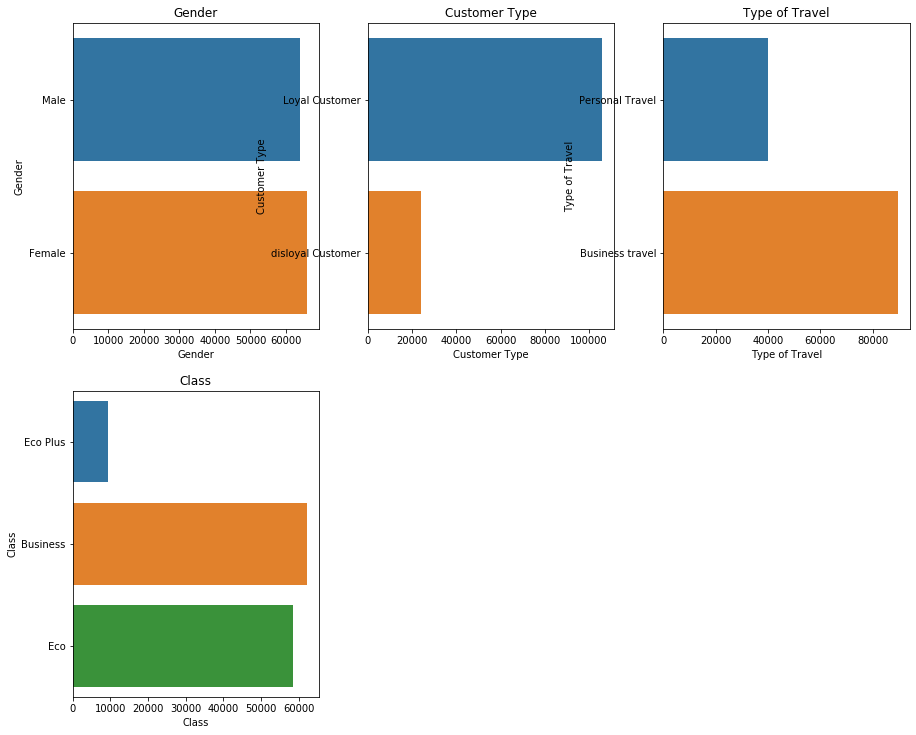

In [17]:
# Check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

In [18]:
# List of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['satisfaction','']))]
print('Number of numerical variables: ', len(numerical_features))

# Visualize the numerical variables
df[numerical_features].head()

Number of numerical variables:  17


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0


In [19]:
# Checking discrete
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 14


In [20]:
# Checking continuous
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 3


In [21]:
# Check the list of categorical variables
df.select_dtypes(include=['object']).columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [22]:
# Handle categorical features
cat_columns = ['Class']
for col in  cat_columns:
    df = pd.concat([df.drop(col, axis=1),pd.get_dummies(df[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [23]:
bool_columns = ['Gender', 'Customer Type', 'Type of Travel']
for col in  bool_columns:
    df[col+'_new']=df[col].apply(lambda x : 1 if x == 'yes' else 0)
    df.drop(col, axis=1, inplace=True)

In [24]:
df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Class_Eco,Class_Eco Plus,Gender_new,Customer Type_new,Type of Travel_new
0,13,460,3,4,3,1,5,3,5,5,...,4,5,5,25,neutral or dissatisfied,0,1,0,0,0
1,25,235,3,2,3,3,1,3,1,1,...,1,4,1,1,neutral or dissatisfied,0,0,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,4,5,0,satisfied,0,0,0,0,0
3,25,562,2,5,5,5,2,2,2,2,...,1,4,2,11,neutral or dissatisfied,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,3,0,satisfied,0,0,0,0,0


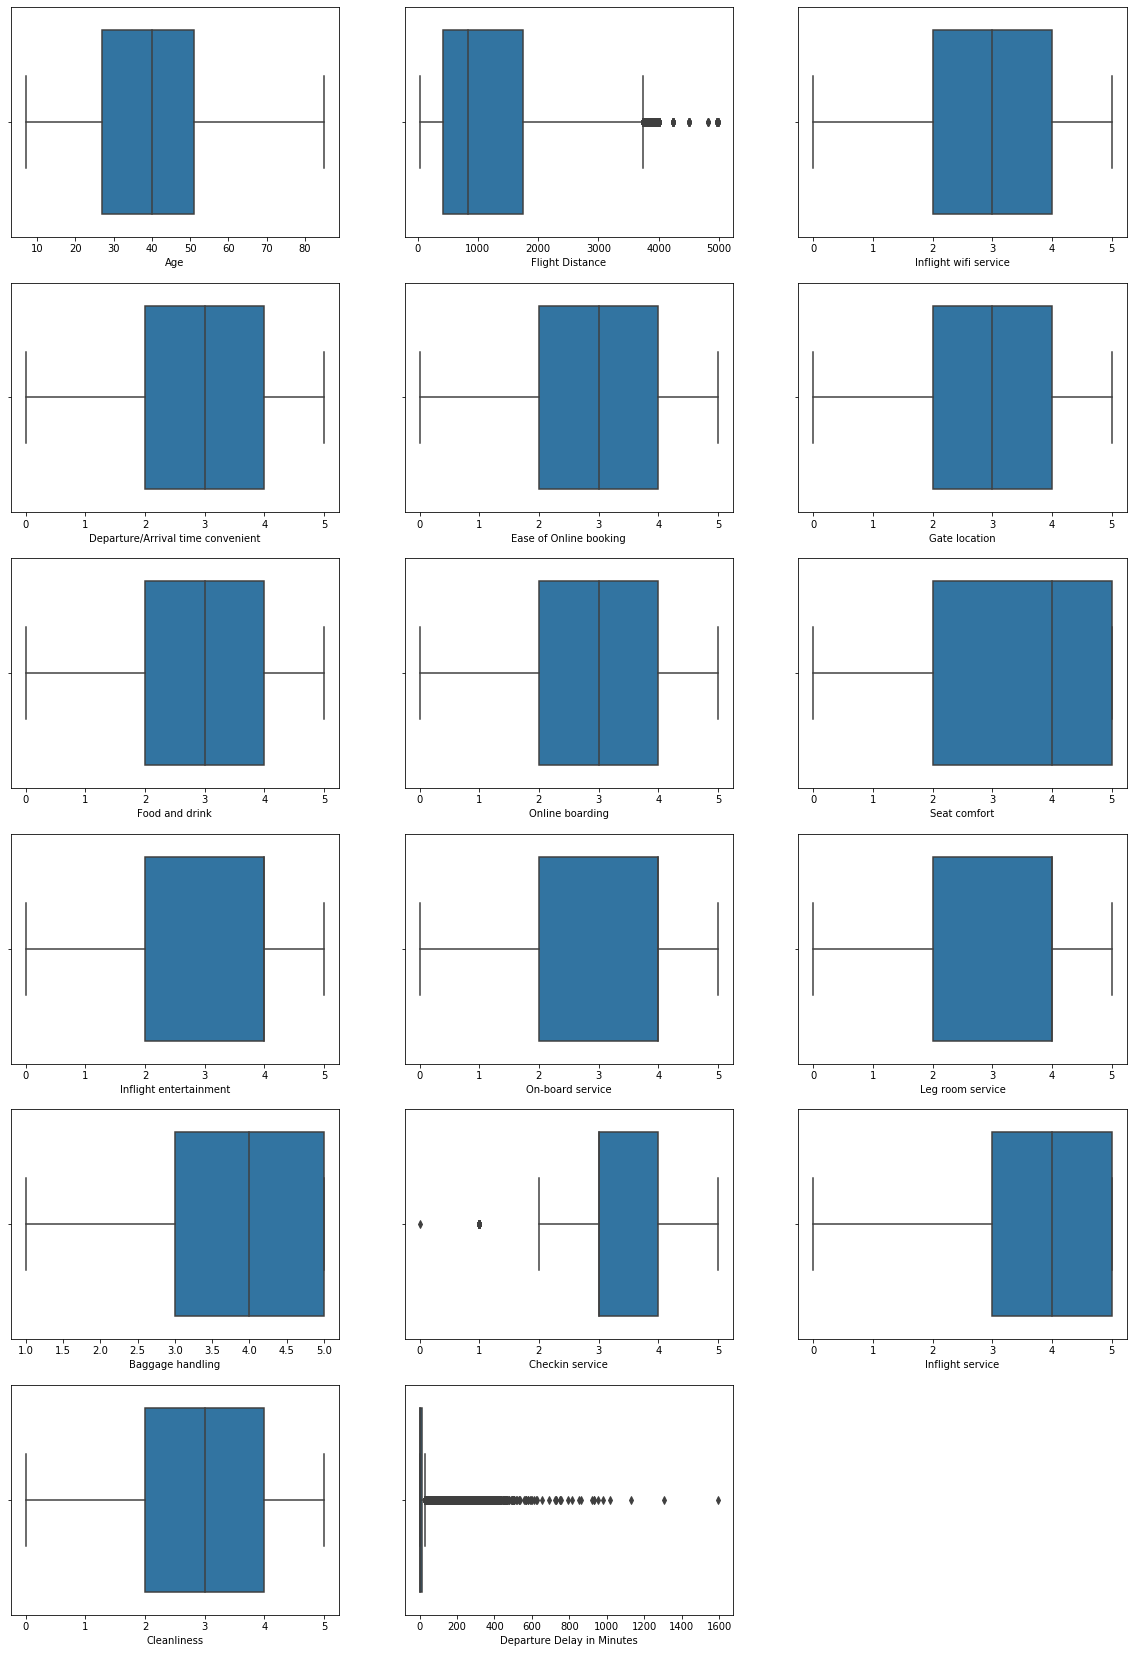

In [25]:
# Boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

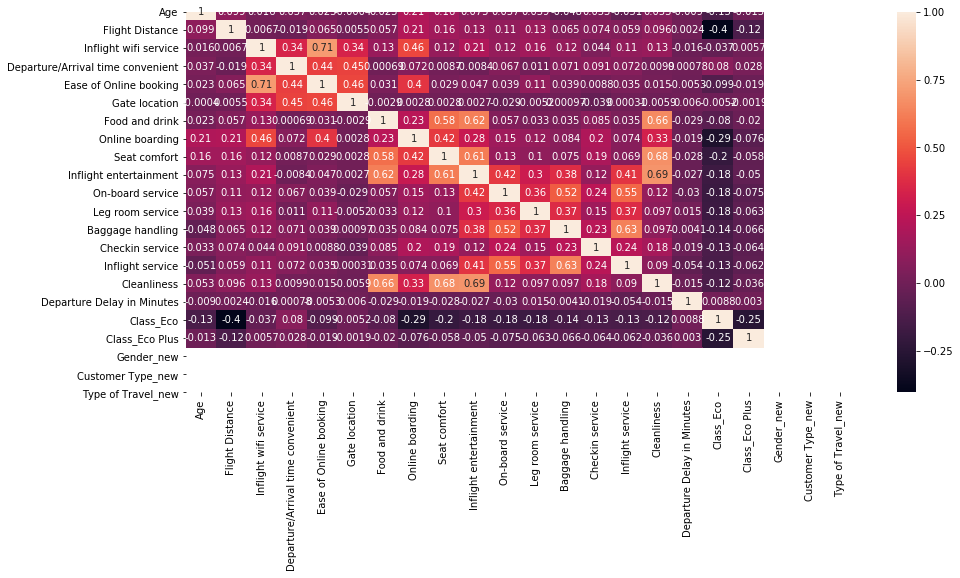

In [26]:
# Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

From the corr table above, the "Ease_of_Online_booking" is highly correlated with "Inflight_wifi_service", with 0.71 value. Also "Inflight_service" is highly correlated with "Baggage_handling", with 0.63 value. But no pair is having corr. coefficient exactly equal to 1. Therefore we are not discarding any variable.

## Making Data Test & Training

In [28]:
X = df.drop(['satisfaction'],axis=1)
y = df['satisfaction']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [29]:
len(X_train)

103904

In [30]:
len(X_test)

25976

In [31]:
print("X_train {}\nX_test {}\ny_train {}\ny_test {}".format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))

X_train (103904, 22)
X_test (25976, 22)
y_train (103904,)
y_test (25976,)


## Random Forest

In [32]:
#importing the libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [33]:
classifier1 = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0,n_jobs=-1)
classifier1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [35]:
y_pred = classifier1.predict(X_test)

In [36]:
# Importing accuracy parameters
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print('\n\n\n')
print('Confusion matrix : \n{}'.format(confusion_matrix(y_test,y_pred)))
print('\n')
print('Accuracy score : {}'.format(accuracy_score(y_test,y_pred)))
acc_random_forest = accuracy_score(y_test,y_pred)

                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.97      0.96     14657
              satisfied       0.96      0.93      0.95     11319

               accuracy                           0.95     25976
              macro avg       0.95      0.95      0.95     25976
           weighted avg       0.95      0.95      0.95     25976





Confusion matrix : 
[[14276   381]
 [  837 10482]]


Accuracy score : 0.9531105635971666


## Naive Bayes

In [37]:
classifier2 = GaussianNB()
classifier2.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
#Predicting on test set results
y_pred = classifier2.predict(X_test)

In [39]:
# importing accuracy parameters
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print('\n\n\n')
print('Confusion matrix : \n{}'.format(confusion_matrix(y_test,y_pred)))
print('\n')
print('Accuracy score : {}'.format(accuracy_score(y_test,y_pred)))
acc_naive_bayes = accuracy_score(y_test,y_pred)

                         precision    recall  f1-score   support

neutral or dissatisfied       0.85      0.84      0.84     14657
              satisfied       0.79      0.81      0.80     11319

               accuracy                           0.82     25976
              macro avg       0.82      0.82      0.82     25976
           weighted avg       0.82      0.82      0.82     25976





Confusion matrix : 
[[12241  2416]
 [ 2182  9137]]


Accuracy score : 0.8229904527255929


In [40]:
print('Accuracy:-\n')
print("Random Forest {}\nNaive Bayes {}\n".format(acc_random_forest,acc_naive_bayes))

Accuracy:-

Random Forest 0.9531105635971666
Naive Bayes 0.8229904527255929



That said, from the comparison above, the best model would be Random Forest